In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras import utils



In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)


In [17]:
class_names = ('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck')


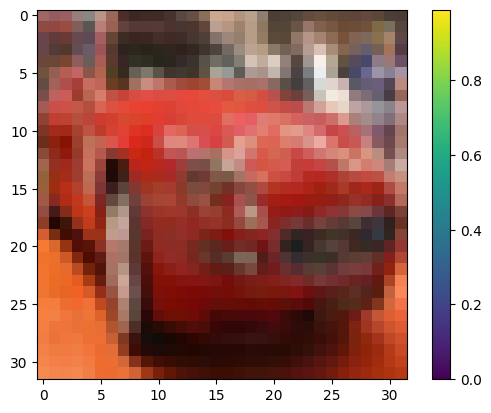

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [20]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

In [21]:
model.compile(optimizer = tf.keras.optimizers.Nadam(use_ema=True),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs = 18)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/18
1563/1563 [==============================] - 13s 6ms/step - loss: 1.3846 - accuracy: 0.4966
Epoch 2/18
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0219 - accuracy: 0.6393
Epoch 3/18
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8686 - accuracy: 0.6961
Epoch 4/18
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7606 - accuracy: 0.7336
Epoch 5/18
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6795 - accuracy: 0.7625
Epoch 6/18
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6057 - accuracy: 0.7869
Epoch 7/18
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5387 - accuracy: 0.8108
Epoch 8/18
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4747 - accuracy: 0.8324
Epoch 9/18
1563/1563 [==============================] - 9s 5ms/step - loss: 0.4128 - accuracy: 0.8529
Epoch 10/18
1563/1563 [==============================] - 9s 6ms/step - loss: 0.35

6

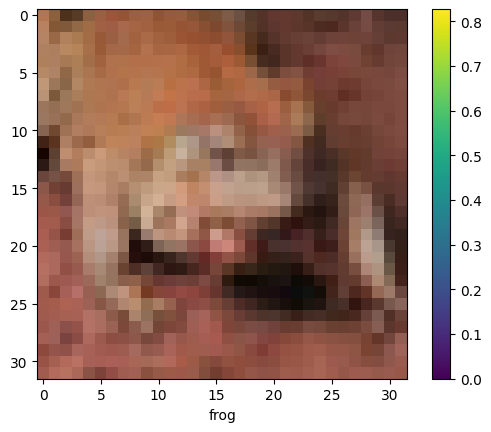

In [23]:
im = 5

predictions[im]

np.argmax(predictions[im])
y_test[im]

plt.figure()
plt.imshow(x_test[im])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_test[im]])

y_test[im]